# Prediksi Harga Rumah dengan Model Sederhana

### Import Dataset & Dependencies

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
house_price_df = df[['sqft_living', 'price']]
house_price_df.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


### Data Preprocessing

In [43]:
# Melihat apakah ada missing values
house_price_df.isnull().sum()

sqft_living    0
price          0
dtype: int64

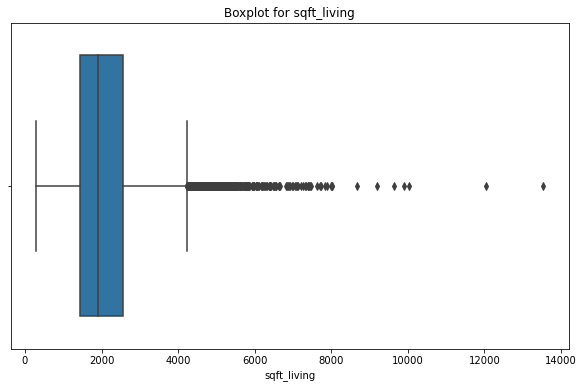

In [44]:
# Visualisasi luas rumah
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sqft_living'])
plt.title('Boxplot for sqft_living')
plt.show()

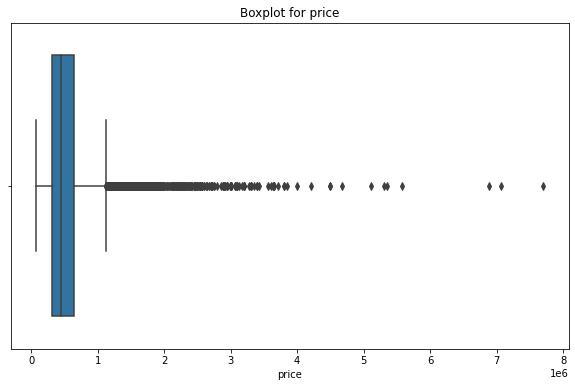

In [45]:
# Visualisasi harga rumah
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot for price')
plt.show()

Log transformations untuk skewed data

In [56]:
house_price_log_df = house_price_df.copy()

house_price_log_df['log_sqft_living'] = np.log(house_price_log_df['sqft_living'])
house_price_log_df['log_price'] = np.log(house_price_log_df['price'])

print(house_price_log_df.head())

   sqft_living     price  log_sqft_living  log_price
0         1180  221900.0         7.073270  12.309982
1         2570  538000.0         7.851661  13.195614
2          770  180000.0         6.646391  12.100712
3         1960  604000.0         7.580700  13.311329
4         1680  510000.0         7.426549  13.142166


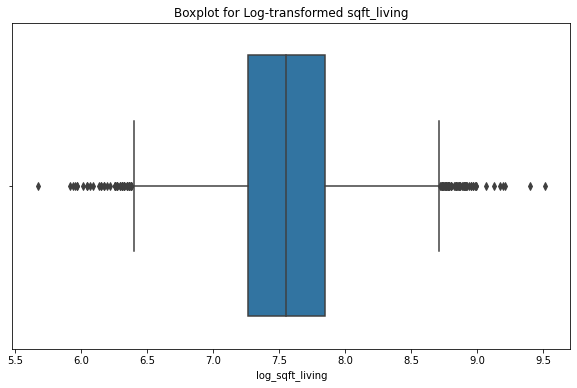

In [57]:
# Visualisasi luas rumah setelah log-transformation
plt.figure(figsize=(10, 6))
sns.boxplot(x=house_price_log_df['log_sqft_living'])
plt.title('Boxplot for Log-transformed sqft_living')
plt.show()

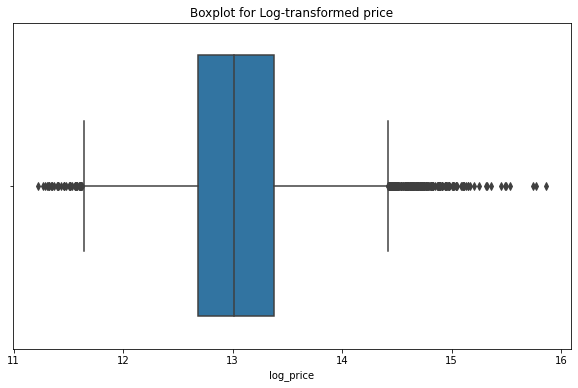

In [58]:
# Visualisasi harga rumah setelah log-transformation
plt.figure(figsize=(10, 6))
sns.boxplot(x=house_price_log_df['log_price'])
plt.title('Boxplot for Log-transformed price')
plt.show()

In [59]:
house_price_log_df.describe()

,sqft_living,price,log_sqft_living,log_price
count,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,2079.899736,5.400881e+05,7.550335,13.047817
std,918.440897,3.671272e+05,0.424807,0.526685
min,290.000000,7.500000e+04,5.669881,11.225243
25%,1427.000000,3.219500e+05,7.263330,12.682152
50%,1910.000000,4.500000e+05,7.554859,13.017003
75%,2550.000000,6.450000e+05,7.843849,13.377006
max,13540.000000,7.700000e+06,9.513404,15.856731


### Modeling

In [60]:
# Splitting dataset ke data tran dan data test

X = house_price_log_df[['log_sqft_living']]
y = house_price_log_df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Training model linear regression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Testing

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.15131182817560335


### Evaluations

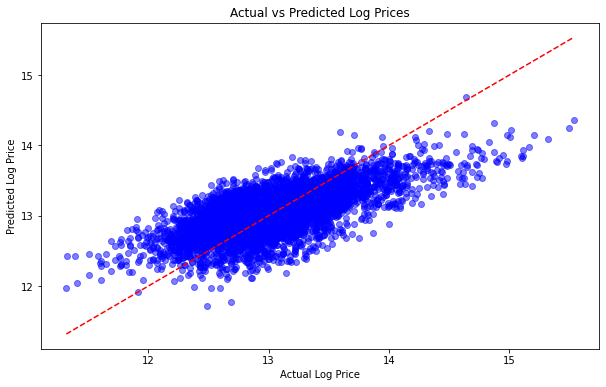

In [63]:
# Visualisasi Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # y=x line
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Actual vs Predicted Log Prices')
plt.show()